##**머신러닝: 결정 트리 모델**

결정트리(Decision Tree)는 머신러닝 알고리즘 중 하나로, flowchart 같은 구조를 가진다. 기본적으로 결정트리는 데이터에 있는 규칙을 통해 데이터셋을 분류/예측하는 지도학습(supervised) 모델이다.

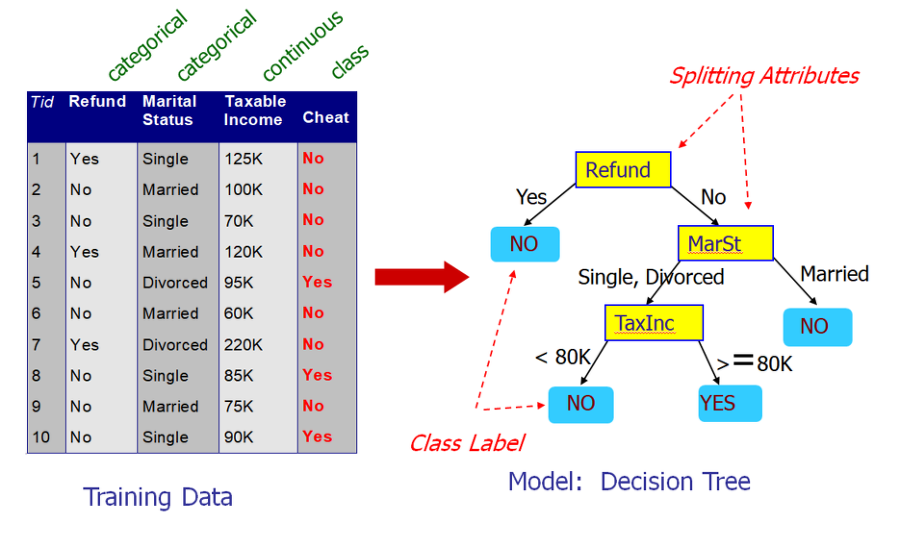

## **센서 데이터로 인간의 움직임 분류하기**

**UCI machine learning repository**</br>
**데이터셋:** https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Kaggle 데이터셋(CSV): https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

실험은 19-48세 사이의 30명의 지원자 그룹으로 수행되었습니다. 각자 스마트폰(Samsung Galaxy S II)을 허리에 착용하고 6가지 활동(WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING)을 수행했습니다. 내장된 가속도계와 자이로스코프를 사용하여 50Hz의 일정한 속도로 3축 선형 가속도와 3축 각속도를 캡처했습니다. 실험은 데이터에 수동으로 레이블을 지정하기 위해 비디오로 녹화되었습니다.

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_roc_curve

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/python_code/ML/dataset/train.csv')

## **분류 정확도 성능 향상: 결정트리의 하이퍼 매개변수 설정**

교차 검증(cross validation)은 train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'max_depth': [n for n in range(5, 30)]}

In [ ]:
grid_cv = GridSearchCV(dtc, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score=True)

In [ ]:
grid_cv.fit(train_X, train_Y)

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [ ]:
cv_results_df[['rank_test_score', 'param_max_depth', 'mean_test_score', 'mean_train_score']]

In [ ]:
grid_cv.best_score_, grid_cv.best_params_

## **시각화**

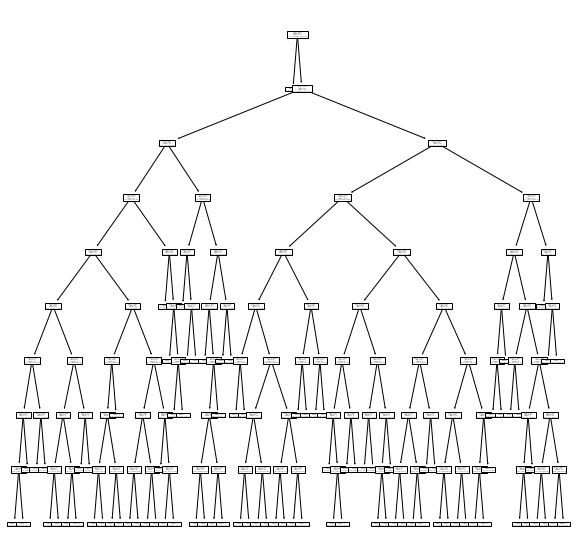

In [ ]:
from sklearn import tree

plt.figure(figsize=(10, 10))
tree.plot_tree(dtc)
plt.show()

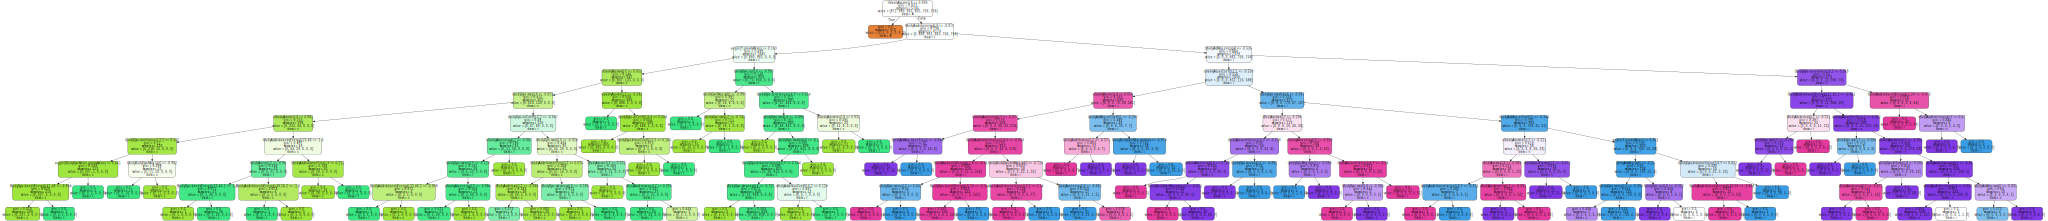

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, filled=True, rounded = True, feature_names=df.columns[:-1],  class_names=df.columns[-1]) #feature_names=df.columns[:-1],  class_names=df.columns[-1]
graph = graphviz.Source(dot_data)
graph.render('test')
#graph